## Introduction

In this notebook, we are going to perform data analysis and build machine learning model from loan application data. The aim of this task is to build a model which can predict whether or not a client/applicant will repay the loan or have difficulty which can lead to significant losses. The training dataset consists of several information (22 in total) which might be useful in predicting the client reliability. There are only 2 target values: risky (1) or not risky (0), hence we are dealing with binary classification problem. 

## Importing Dataset

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Make sure that you place the dateset in the working directory.

In [2]:
df = pd.read_csv('train.csv')
df = df.drop(df.columns[0], axis=1)
df

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,Working,...,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,Commercial associate,...,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,Pensioner,...,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,State servant,...,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,Commercial associate,...,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,251159,0,Cash loans,M,2,360000.0,450000.0,44509.5,450000.0,State servant,...,-14268,-5813,-2313.0,-2709,FRIDAY,6,Electricity,0.295858,0.104877,0.616122
61499,441376,1,Cash loans,F,0,441000.0,904500.0,38452.5,904500.0,Pensioner,...,-21582,365243,-4106.0,-4191,TUESDAY,12,NA1,0.693816,0.411595,0.239226
61500,184648,0,Revolving loans,F,0,202500.0,900000.0,45000.0,900000.0,Commercial associate,...,-17729,-1564,-11844.0,-1263,FRIDAY,16,Industry: type 12,0.802154,0.714627,NaN
61501,313981,0,Cash loans,F,0,94500.0,360000.0,17509.5,360000.0,Working,...,-11258,-4159,-5060.0,-3698,FRIDAY,15,Business Entity Type 3,NaN,0.694125,0.105473


## Choosing the Right Metrics

Let's take a look at the frequency of each TARGET class on our dataset.

<AxesSubplot:xlabel='TARGET', ylabel='count'>

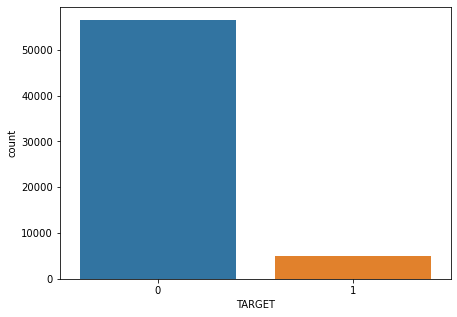

In [3]:
plt.figure(figsize=(7,5))
sns.countplot(df['TARGET'])

Our dataset has imbalanced class distribution with 91.92% of the data points are classified as 0 (low risk applicant). Accuracy is not a good metrics for this case because we can achieve high accuracy (>0.9) by just predicting each client as a low risk applicant. The most appropriate metrics for this case is AUC (area under the ROC curve) which represents the area under the ROC (receiver operating characteristic) curve. This metrics will explain how well our model can distinguish between classes. The higher the AUC score, the better the model is at distinguishing 0 as 0 and 1 as 1. 

## Exploratory Data Analysis (EDA)

### TARGET variable dependence on categorical features

First, we will examine the relation between the TARGET variable with all of the categorical features by using boxplot. The purpose of this plotting routine is to find several variables which might affect the TARGET variable significantly.

Note: we do not show the ORGANIZATION_TYPE plot here since this feature contains 58 distinct categorical classes and the plot will not be readable.

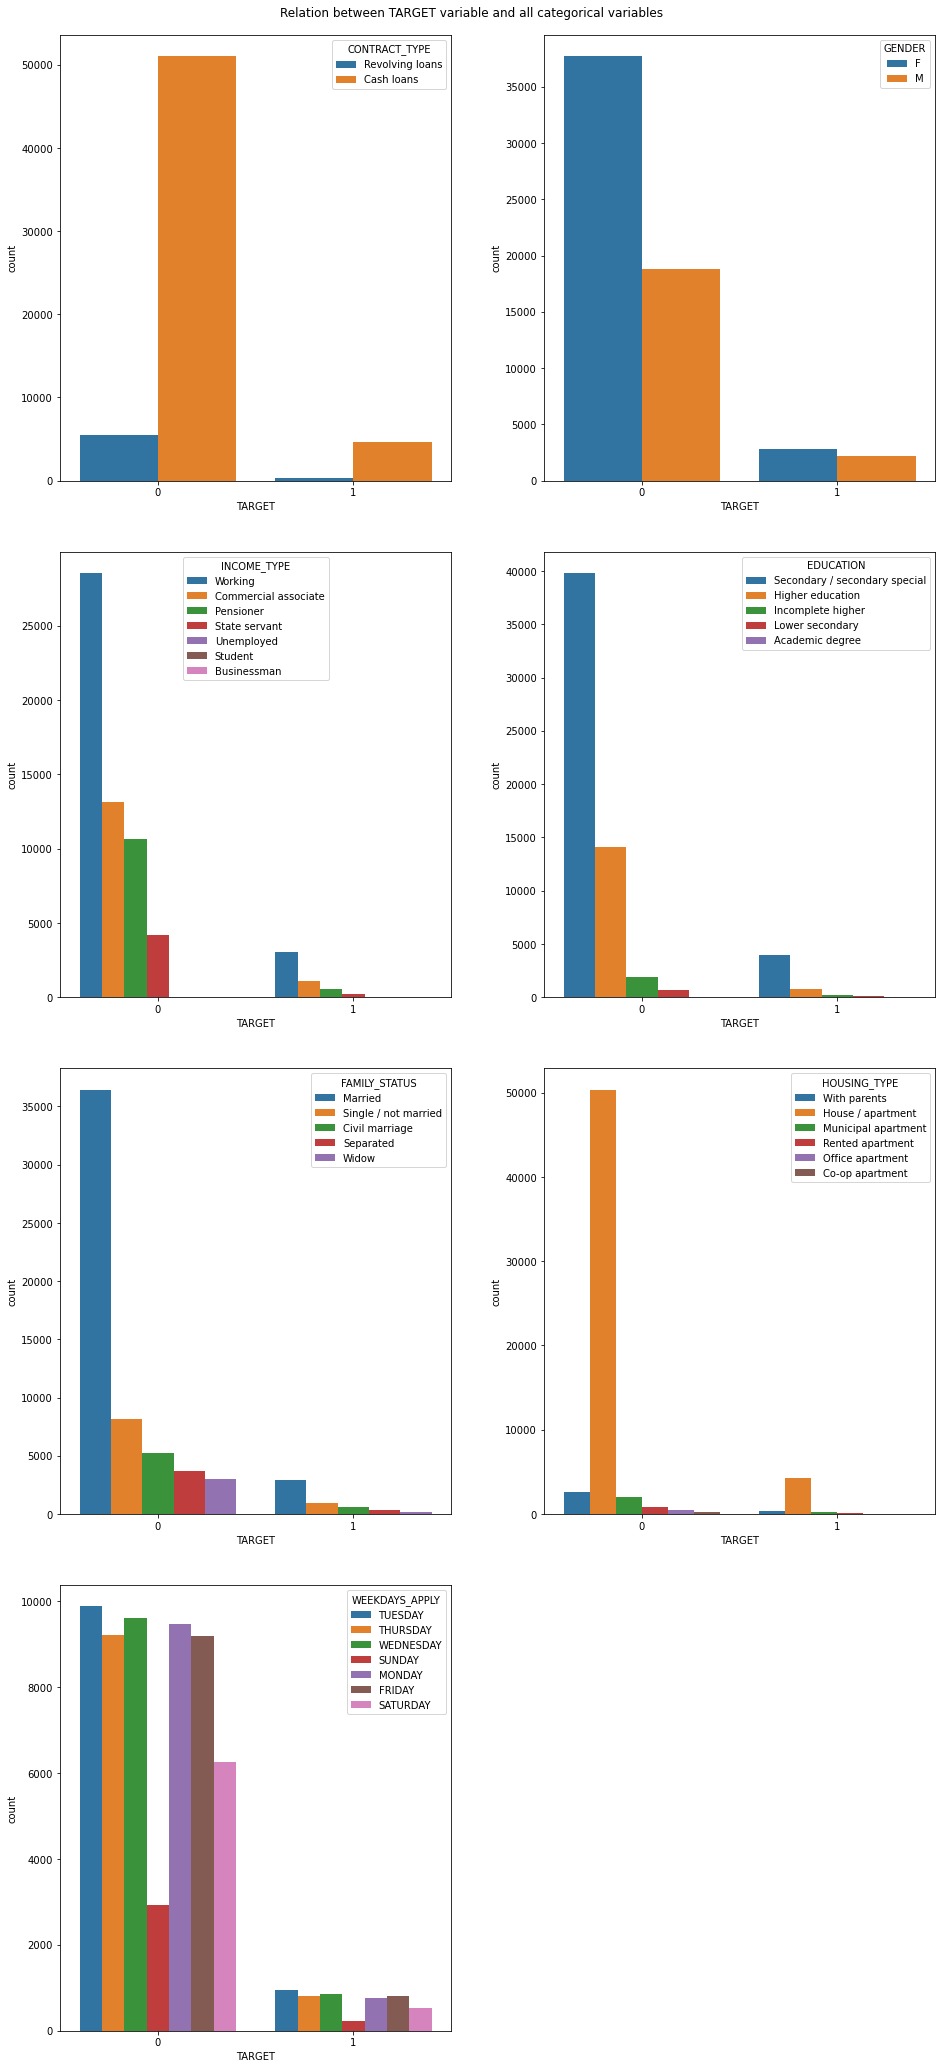

In [4]:
cols = ['CONTRACT_TYPE','GENDER','INCOME_TYPE','EDUCATION','FAMILY_STATUS','HOUSING_TYPE','WEEKDAYS_APPLY',
        'PREV_STATUS']
fig = plt.figure(figsize=(14,30))
for c,i in zip(cols, range(1,8)):
    ax = fig.add_subplot(4,2,i)
    sns.countplot(x='TARGET',hue=c,data=df)
fig.suptitle('Relation between TARGET variable and all categorical variables',y=0.97)
fig.tight_layout(pad=4.0)

It seems that we can't find any significant relations between all of the categorical features and the TARGET variable. The distribution on both TARGET classes are similiar for every feature. 

###  TARGET variable dependence on numerical features

Next, we will examine the relation between the TARGET variable with all of the numerical features. 

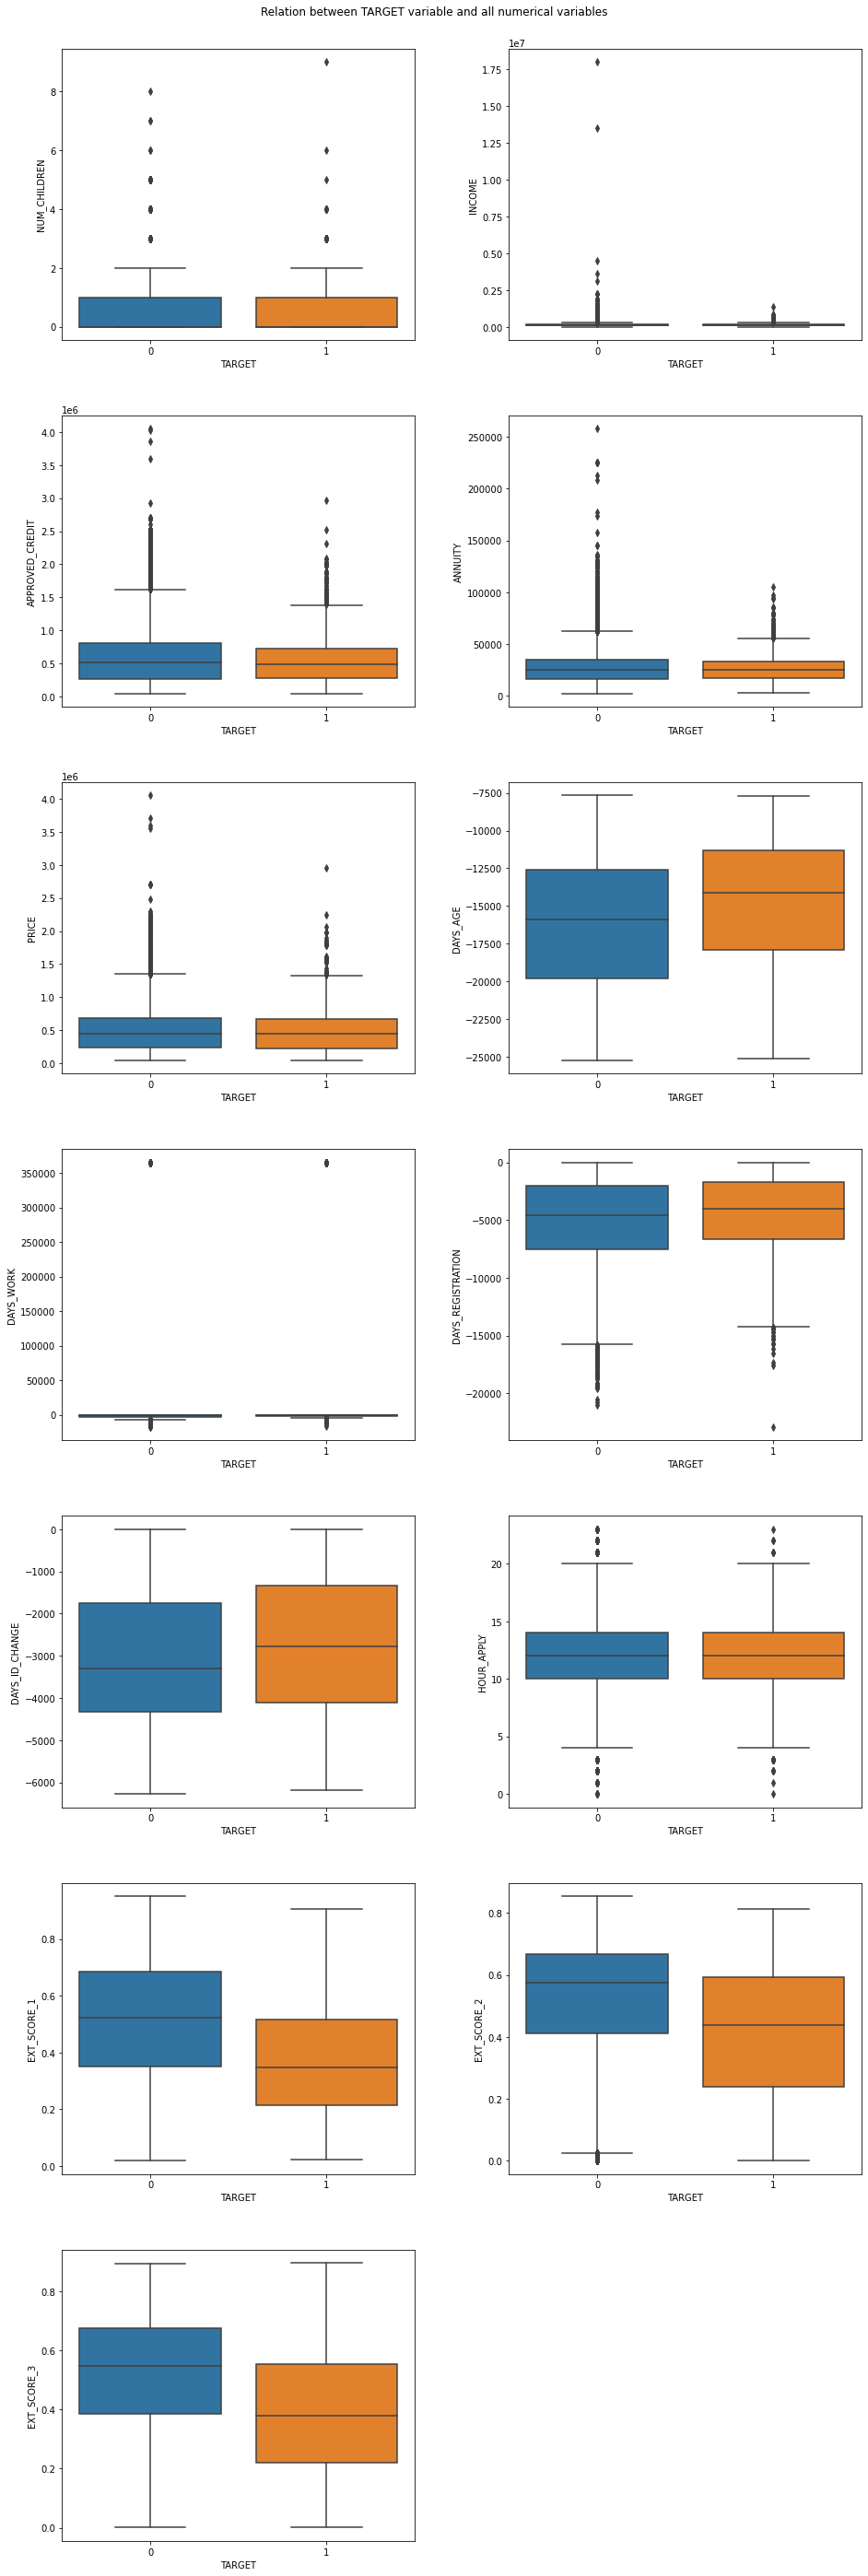

In [5]:
cols = ['NUM_CHILDREN','INCOME','APPROVED_CREDIT','ANNUITY','PRICE','DAYS_AGE','DAYS_WORK','DAYS_REGISTRATION',
       'DAYS_ID_CHANGE','HOUR_APPLY','EXT_SCORE_1','EXT_SCORE_2','EXT_SCORE_3']
fig = plt.figure(figsize=(14,40))
for c,i in zip(cols, range(1,14)):
    ax = fig.add_subplot(7,2,i)
    sns.boxplot(x='TARGET',y=c,data=df)
fig.suptitle('Relation between TARGET variable and all numerical variables', y=0.98)
fig.tight_layout(pad=4.0)

Several remarks:
- It seems that risky clients have smaller and limited APPROVED_CREDIT and ANNUITY value.
- Client with younger age tend to have higher potential risk at repaying loans (based on DAYS_AGE plot).
- Client with low EXT_SCORE (1, 2, or 3) value tend to be more risky.

Also note that the plot for INCOME and DAYS_WORK are not readable. The reason is because INCOME feature has high variability and DAYS_WORK has anomaly values (large positive value of 365243) on it. To overcome this, use logarithmic scale on INCOME feature and drop the anomaly values on DAYS_WORK feature when plotting them.

<AxesSubplot:xlabel='TARGET', ylabel='DAYS_WORK'>

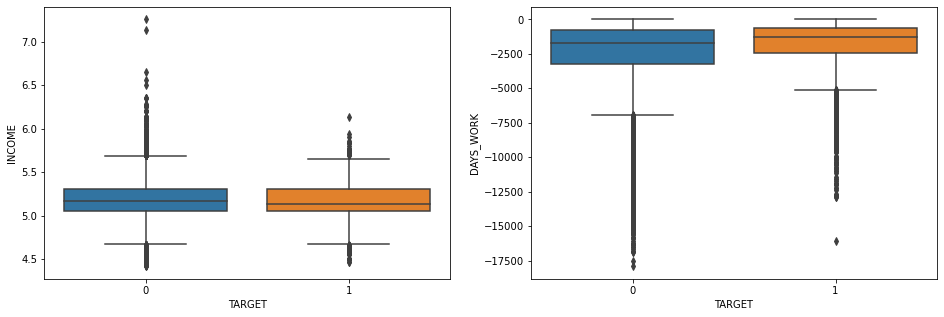

In [6]:
f, (ax1, ax2) = plt.subplots(figsize=(16,5), nrows=1, ncols=2)
sns.boxplot(x='TARGET', y=np.log(df['INCOME'].dropna())/np.log(10), data=df, ax=ax1)
sns.boxplot(x='TARGET', y='DAYS_WORK', data=df[df['DAYS_WORK']<0], ax=ax2)

### Anomaly on DAYS_WORK

Anomaly are clearly visible on the DAYS_WORK feature. The distribution of DAYS_WORK values is really weird.

Text(0.5, 0.98, 'Distribution of DAYS_WORK value')

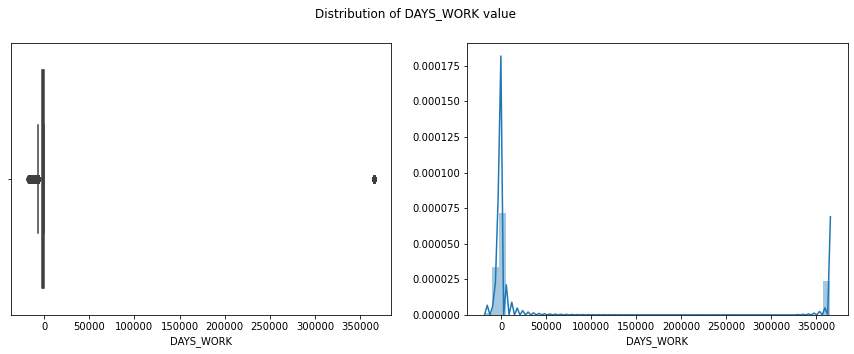

In [7]:
f, (ax1, ax2) = plt.subplots(figsize=(15,5), nrows=1, ncols=2)
sns.boxplot(df['DAYS_WORK'].dropna(), ax=ax1)
sns.distplot(df['DAYS_WORK'].dropna(), ax=ax2)
plt.suptitle('Distribution of DAYS_WORK value')

Because every DAYS_WORK value is computed with respect to the current application date, the value should be negative. But, some records have really huge positive DAYS_WORK value of 365243 (1000 days if converted) which is nonsense. It turns out that this weird value has some relation with the applicants’ occupation.

<AxesSubplot:xlabel='DAYS_WORK', ylabel='INCOME_TYPE'>

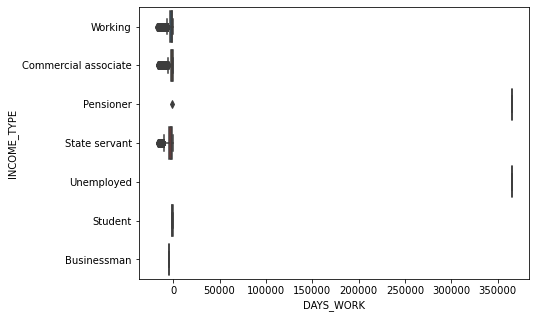

In [8]:
plt.figure(figsize=(7,5))
sns.boxplot(y='INCOME_TYPE', x='DAYS_WORK', data=df)

All clients with positive DAYS_WORK value are either unemployed or a pensioner. Hence, DAYS_WORK of 365243 means NA value which refers that the corresponding client has no occupation. For now, let’s not modify this feature (we will deal with this anomaly in later section).

### Relation between several variables

Lastly, we will try to find relation between several features (mostly numeric) by using correlation heatmap. Here, Pearson correlation coefficients are calculated for every pair of numerical features.

<AxesSubplot:>

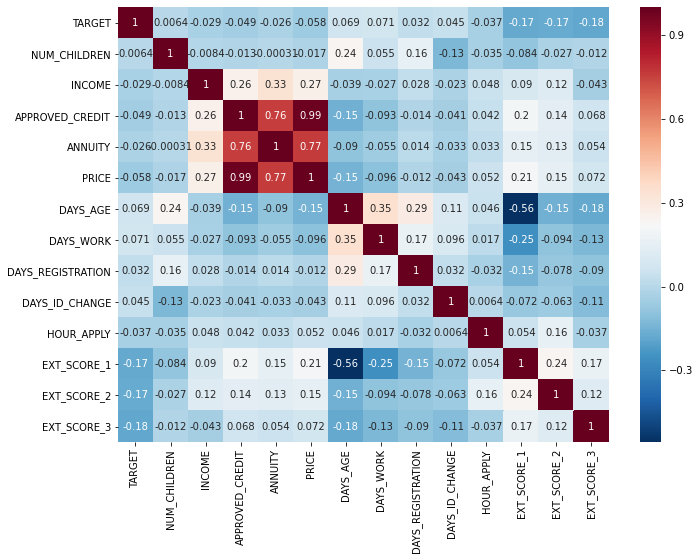

In [9]:
plt.rcParams['figure.figsize'] = [11, 8]
sns.heatmap(df[df['DAYS_WORK']<0].drop(columns=['LN_ID']).corr(),annot=True,cmap='RdBu_r')

Some feautres have high correlation with other features:
- APPROVED_CREDIT and PRICE &#8594;  almost perfect correlation! Almost in every case, APPROVED_CREDIT equals to PRICE value.
- APPROVED_CREDIT and ANNUITY &#8594; clearly, higher credit limit will have higher annuity.
- PRICE and ANNUITY &#8594; due to almost perfect correlation between APPROVED_CREDIT and PRICE.

Let's plot some of these relations.

<AxesSubplot:xlabel='ANNUITY', ylabel='PRICE'>

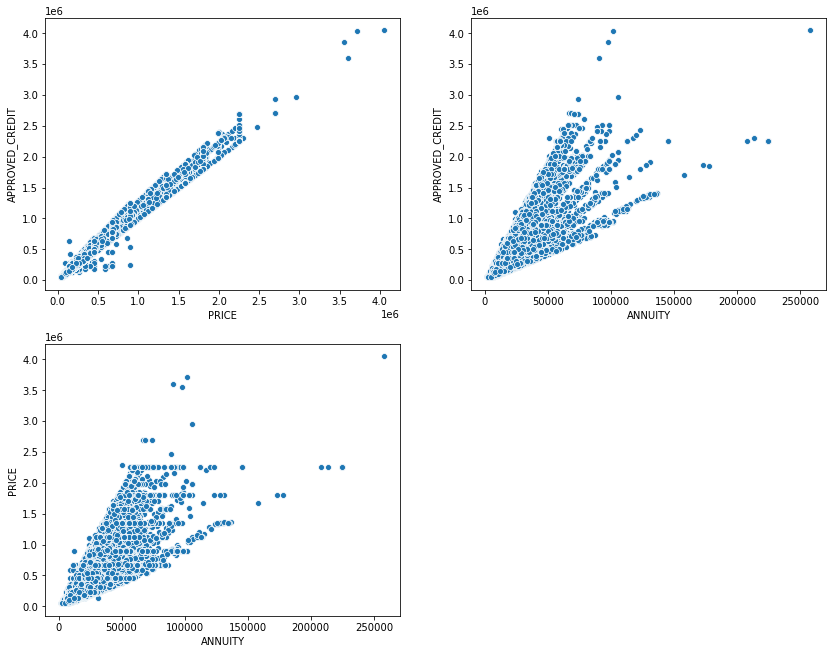

In [10]:
fig = plt.figure(figsize=(14,11))
fig.add_subplot(2,2,1)
sns.scatterplot(x='PRICE',y='APPROVED_CREDIT',data=df)
fig.add_subplot(2,2,2)
sns.scatterplot(x='ANNUITY',y='APPROVED_CREDIT',data=df)
fig.add_subplot(2,2,3)
sns.scatterplot(x='ANNUITY',y='PRICE',data=df)

## Simple Transformation

Features with prefix 'DAYS' always consist of negative values. We want to do some simple transformation on those features (DAYS_AGE, DAYS_WORK, DAYS_REGISTRATION, and DAYS_ID_CHANGE) for easier interpretation as follows.
- Divide DAYS_REGISTRATION and DAYS_ID_CHANGE by -1.
- Divide DAYS_AGE by -365 and rename it to AGE.
- Divide DAYS_WORK by -365 and rename it to YEARS_WORK.

In [11]:
df['AGE'] = df['DAYS_AGE']/(-365)
df['YEARS_WORK'] = df['DAYS_WORK']/(-365)
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION']/(-1)
df['DAYS_ID_CHANGE'] = df['DAYS_ID_CHANGE']/(-1)
df = df.drop(columns=['DAYS_AGE','DAYS_WORK'])

## Handling Missing Values

In [12]:
df.isna().sum()

LN_ID                    0
TARGET                   0
CONTRACT_TYPE            0
GENDER                   0
NUM_CHILDREN             0
INCOME                   0
APPROVED_CREDIT          0
ANNUITY                  1
PRICE                   62
INCOME_TYPE              0
EDUCATION                0
FAMILY_STATUS            0
HOUSING_TYPE             0
DAYS_REGISTRATION        0
DAYS_ID_CHANGE           0
WEEKDAYS_APPLY           0
HOUR_APPLY               0
ORGANIZATION_TYPE        0
EXT_SCORE_1          34845
EXT_SCORE_2            134
EXT_SCORE_3          12239
AGE                      0
YEARS_WORK               0
dtype: int64

First, the ANNUITY feature. Here, annuity represents the amount that must be paid monthly by the client which should be related with the loan amount itself (APPROVED_CREDIT). The relation must be "annuity = loan percentage × loan amount". From this relation, we can impute the missing value in ANNUITY by calculating the median of loan percentage (defined as ANNUITY/APPROVED_CREDIT) of the dataset and multiply it by the APRROVED_CREDIT value of the missing record. 


In [13]:
df.loc[df['ANNUITY'].isna(),'ANNUITY'] = (df['ANNUITY']/df['APPROVED_CREDIT']).median()*df.loc[df['ANNUITY'].isna(),'APPROVED_CREDIT']

For PRICE feature, based on correlation heatmap, we can see that PRICE feature is almost perfectly correlated with APPROVED_CREDIT feature with coefficient of 0.99. This means that we can impute the missing values in PRICE with the APPROVED_CREDIT values.  

In [14]:
df.loc[df['PRICE'].isna(),'PRICE'] = df.loc[df['PRICE'].isna(),'APPROVED_CREDIT']

For EXT_SCORE_2, we have only 134 missing values so we can safely impute them by the median value. 

In [15]:
df.loc[df['EXT_SCORE_2'].isna(),'EXT_SCORE_2'] = df['EXT_SCORE_2'].median()

The remaining features to be handled are EXT_SCORE_1 and EXT_SCORE_3. EXT_SCORE_1 feature has 34845 missing values (more than 55% of the total records). Imputing all of these missing values will be dangerous. For EXT_SCORE_3, we have 12239 missing values (almost 20% of the total records). Actually, it is quite risky to impute them with median value because the distribution will change a lot. For now, let’s leave these missing values (we will deal with that in later section).

## Deriving New Features

Using ‘limited’ domain knowledge in banking and finance, we will derive another potential features from another table.

Table prev_app.csv provides several information about the previous loan application of each client. Some reasonable new features which can be derived are:
- PREV_COUNT → total number of previous loan applications
- PREV_STATUS → the most common value of CONTRACT_STATUS of all previous applications
- LAST_DAYS_DEC → relative to the current application, when was the decision of the last previous application made (positive maximum value of DAYS_DECISION)


In [16]:
dfp = pd.read_csv('prev_app.csv')
dfp = dfp.drop(dfp.columns[0], axis=1)

#total number of previous loan applications (PREV_COUNT)
join1 = pd.merge(df, dfp.groupby('LN_ID').count()['SK_ID_PREV'], on='LN_ID', how='left')

#the most common value of CONTRACT_STATUS of all previous applications (PREV_STATUS)
join1 = pd.merge(join1, dfp.groupby(['LN_ID'])['CONTRACT_STATUS'].agg(lambda x: x.value_counts().index[0]), on='LN_ID', how='left')

#positive maximum value of DAYS_DECISION (LAST_DAYS_DEC)
join1 = pd.merge(join1, -dfp.groupby('LN_ID')['DAYS_DECISION'].max(), on='LN_ID', how='left')

Table installment_payment.csv provides payment information of each installment related to the previous loan application of each client. Some reasonable new features which can be derived are:
- PAY_INTERVAL_DAYS → mean difference between INST_DAYS and PAY_DAYS (to measure whether the payments were on time or not)
- AMT_PAY_DIFF → mean difference between AMT_INST and AMT_PAY (to measure whether the payments were accurate or not)


In [17]:
dfi = pd.read_csv('installment_payment.csv')
dfi = dfi.drop(dfi.columns[0], axis=1)

dfi['PAY_INTERVAL_DAYS'] = dfi['INST_DAYS']-dfi['PAY_DAYS']
dfi['AMT_PAY_DIFF'] = dfi['AMT_INST']-dfi['AMT_PAY']

#mean difference between INST_DAYS and PAY_DAYS (PAY_INTERVAL_DAYS)
join2 = pd.merge(join1, dfi.groupby('LN_ID')['PAY_INTERVAL_DAYS'].mean(), on='LN_ID', how='left')

#mean difference between AMT_INST and AMT_PAY (AMT_PAY_DIFF)
join2 = pd.merge(join2, dfi.groupby('LN_ID')['AMT_PAY_DIFF'].mean(), on='LN_ID', how='left')

join2 = join2.rename(columns={"SK_ID_PREV": "PREV_COUNT", "CONTRACT_STATUS": "PREV_STATUS", "DAYS_DECISION" : "LAST_DAYS_DEC"})

All of these derived features are related to the past data of the clients. The idea here is we can determine whether a client is risky or not by his/her previous loan data. One consequence of using these features is all new clients will have NA values on these features because they don’t have previous loan data. Fortunately, handling these missing values is quite easy. 
- PREV_COUNT → impute with zeroes. 
- PREV_STATUS → impute with another categorical class called ‘NA1’ which means no previous loan application. 

For LAST_DAYS_DEC, PAY_INTERVAL_DAYS, and AMT_PAY_DIFF, NA value literally means no past application. Therefore, imputing them would be quite nonsensical. For now, let’s leave these missing values (we will deal with that in upcoming section).

In [18]:
#impute PREV_COUNT with 0
join2.loc[join2['PREV_COUNT'].isna(),'PREV_COUNT'] = 0

#impute PREV_STATUS with new categorical class 'NA1'
join2.loc[join2['PREV_STATUS'].isna(),'PREV_STATUS'] = 'NA1'

join2

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,...,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3,AGE,YEARS_WORK,PREV_COUNT,PREV_STATUS,LAST_DAYS_DEC,PAY_INTERVAL_DAYS,AMT_PAY_DIFF
0,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,Working,...,0.572805,0.608276,NaN,31.613699,2.523288,1.0,Approved,596.0,14.750000,0.000000
1,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,Commercial associate,...,0.655600,0.684298,NaN,43.131507,12.279452,10.0,Approved,232.0,3.861111,-92.277083
2,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,Pensioner,...,NaN,0.580687,0.749022,56.917808,-1000.665753,6.0,Approved,10.0,5.000000,0.000000
3,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,State servant,...,NaN,0.623740,0.710674,56.600000,28.643836,4.0,Approved,765.0,5.843137,1567.817647
4,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,Commercial associate,...,0.175511,0.492994,0.085595,24.693151,3.260274,6.0,Approved,380.0,5.030303,758.203636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,251159,0,Cash loans,M,2,360000.0,450000.0,44509.5,450000.0,State servant,...,0.295858,0.104877,0.616122,39.090411,15.926027,14.0,Refused,179.0,7.836364,0.000000
61499,441376,1,Cash loans,F,0,441000.0,904500.0,38452.5,904500.0,Pensioner,...,0.693816,0.411595,0.239226,59.128767,-1000.665753,5.0,Approved,369.0,2.813333,35.114400
61500,184648,0,Revolving loans,F,0,202500.0,900000.0,45000.0,900000.0,Commercial associate,...,0.802154,0.714627,NaN,48.572603,4.284932,0.0,NA1,NaN,NaN,NaN
61501,313981,0,Cash loans,F,0,94500.0,360000.0,17509.5,360000.0,Working,...,NaN,0.694125,0.105473,30.843836,11.394521,9.0,Approved,211.0,7.793388,143.641488


## Handling Missing Values (Continued)

In [19]:
nas = join2.isna().sum()
nas[nas>0]

EXT_SCORE_1          34845
EXT_SCORE_3          12239
LAST_DAYS_DEC         3326
PAY_INTERVAL_DAYS     3196
AMT_PAY_DIFF          3196
dtype: int64

We still have NA values in several features that must be handled. Many strategies can be employed to handle this problem. In this case, we will discuss 2 strategies.

### Strategy 1: impute all missing values

For this strategy, we use the following principle: impute the missing values or just drop the feature. The main reason of this principle is because most of the machine learning algorithm are not able to handle missing values automatically. They will throw an error if the training dataset contains NA values. Using this strategy, we will use the following steps:
- Drop EXT_SCORE_1 feature (more than 55% of missing values cannot be imputed). 
- Impute NA values in EXT_SCORE_3 with the median value (let's take the risk).
- Impute NA values in LAST_DAYS_DEC, PAY_INTERVAL_DAYS, and AMT_PAY_DIFF with zeroes.
 
Remember the anomaly in DAYS_WORK (renamed into YEARS_WORK)? Those values must be imputed too. In this strategy, we can impute them with zeroes.

In [20]:
data1 = join2.copy()

#drop EXT_SCORE_1
data1 = data1.drop(columns=['EXT_SCORE_1'])

#impute EXT_SCORE_3 with median
data1.loc[data1['EXT_SCORE_3'].isna(),'EXT_SCORE_3'] = data1['EXT_SCORE_3'].median()

#replace anomaly values in YEARS_WORK with zeroes
data1.loc[data1['YEARS_WORK']<0,'YEARS_WORK'] = 0

#impute LAST_DAYS_DEC, PAY_INTERVAL_DAYS, and AMT_PAY_DIFF with zeroes
data1.loc[data1['LAST_DAYS_DEC'].isna(),'LAST_DAYS_DEC'] = 0
data1.loc[data1['PAY_INTERVAL_DAYS'].isna(),'PAY_INTERVAL_DAYS'] = 0
data1.loc[data1['AMT_PAY_DIFF'].isna(),'AMT_PAY_DIFF'] = 0

data1

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,...,ORGANIZATION_TYPE,EXT_SCORE_2,EXT_SCORE_3,AGE,YEARS_WORK,PREV_COUNT,PREV_STATUS,LAST_DAYS_DEC,PAY_INTERVAL_DAYS,AMT_PAY_DIFF
0,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,Working,...,Business Entity Type 3,0.608276,0.535276,31.613699,2.523288,1.0,Approved,596.0,14.750000,0.000000
1,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,Commercial associate,...,Other,0.684298,0.535276,43.131507,12.279452,10.0,Approved,232.0,3.861111,-92.277083
2,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,Pensioner,...,NA1,0.580687,0.749022,56.917808,0.000000,6.0,Approved,10.0,5.000000,0.000000
3,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,State servant,...,Culture,0.623740,0.710674,56.600000,28.643836,4.0,Approved,765.0,5.843137,1567.817647
4,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,Commercial associate,...,Construction,0.492994,0.085595,24.693151,3.260274,6.0,Approved,380.0,5.030303,758.203636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,251159,0,Cash loans,M,2,360000.0,450000.0,44509.5,450000.0,State servant,...,Electricity,0.104877,0.616122,39.090411,15.926027,14.0,Refused,179.0,7.836364,0.000000
61499,441376,1,Cash loans,F,0,441000.0,904500.0,38452.5,904500.0,Pensioner,...,NA1,0.411595,0.239226,59.128767,0.000000,5.0,Approved,369.0,2.813333,35.114400
61500,184648,0,Revolving loans,F,0,202500.0,900000.0,45000.0,900000.0,Commercial associate,...,Industry: type 12,0.714627,0.535276,48.572603,4.284932,0.0,NA1,0.0,0.000000,0.000000
61501,313981,0,Cash loans,F,0,94500.0,360000.0,17509.5,360000.0,Working,...,Business Entity Type 3,0.694125,0.105473,30.843836,11.394521,9.0,Approved,211.0,7.793388,143.641488


### Strategy 2: partially impute missing values

This strategy is fairly simple: do not impute the NA values if we not sure how to deal with that or if the NA values literally represent undefined values; just leave them. Why? Because there are some machine learning algorithm which can handle missing values automatically such as XGBoost and LightGBM. Therefore, if we can't impute them, let the algorithm do that. Using this strategy, we will use the following steps:
- Do not impute any NA value in EXT_SCORE_1 and EXT_SCORE_3.
- Replace anomaly values in YEARS_WORK with NA values.
- Do not impute any NA value in LAST_DAYS_DEC, PAY_INTERVAL_DAYS, and AMT_PAY_DIFF.

In [21]:
data2 = join2.copy()

#replace anomaly values in YEARS_WORK with NA values
data2.loc[data2['YEARS_WORK']<0,'YEARS_WORK'] = np.nan

data2

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,...,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3,AGE,YEARS_WORK,PREV_COUNT,PREV_STATUS,LAST_DAYS_DEC,PAY_INTERVAL_DAYS,AMT_PAY_DIFF
0,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,Working,...,0.572805,0.608276,NaN,31.613699,2.523288,1.0,Approved,596.0,14.750000,0.000000
1,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,Commercial associate,...,0.655600,0.684298,NaN,43.131507,12.279452,10.0,Approved,232.0,3.861111,-92.277083
2,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,Pensioner,...,NaN,0.580687,0.749022,56.917808,NaN,6.0,Approved,10.0,5.000000,0.000000
3,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,State servant,...,NaN,0.623740,0.710674,56.600000,28.643836,4.0,Approved,765.0,5.843137,1567.817647
4,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,Commercial associate,...,0.175511,0.492994,0.085595,24.693151,3.260274,6.0,Approved,380.0,5.030303,758.203636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,251159,0,Cash loans,M,2,360000.0,450000.0,44509.5,450000.0,State servant,...,0.295858,0.104877,0.616122,39.090411,15.926027,14.0,Refused,179.0,7.836364,0.000000
61499,441376,1,Cash loans,F,0,441000.0,904500.0,38452.5,904500.0,Pensioner,...,0.693816,0.411595,0.239226,59.128767,NaN,5.0,Approved,369.0,2.813333,35.114400
61500,184648,0,Revolving loans,F,0,202500.0,900000.0,45000.0,900000.0,Commercial associate,...,0.802154,0.714627,NaN,48.572603,4.284932,0.0,NA1,NaN,NaN,NaN
61501,313981,0,Cash loans,F,0,94500.0,360000.0,17509.5,360000.0,Working,...,NaN,0.694125,0.105473,30.843836,11.394521,9.0,Approved,211.0,7.793388,143.641488


To summarize, we now have two datasets with different imputation strategy:
- Type 1 data → completely imputed dataset (suitable for every machine learning algorithm)
- Type 2 data → partially imputed dataset (only for machine learing algorithm which can handle missing values automatically)

## Data Preparation

Before building the predictive model, training data must be prepared in proper form as follows:
- LN_ID column is not needed for modelling purpose (unique value for each record) so we can drop it.
- All categorical columns must be encoded into dummy variables (one hot encoding) because sklearn package cannot handle string categorical data.

In [22]:
#type 1 dataset
cols = ['CONTRACT_TYPE','GENDER','INCOME_TYPE','EDUCATION','FAMILY_STATUS','HOUSING_TYPE','WEEKDAYS_APPLY',
        'ORGANIZATION_TYPE','PREV_STATUS']
dat1 = data1.drop(columns=['LN_ID'])

#one hot encoding
dat1 = pd.concat([dat1,pd.get_dummies(dat1[cols])],axis=1)
dat1 = dat1.drop(columns=cols)
X1 = dat1.drop('TARGET',axis=1)
y = dat1['TARGET']

In [23]:
#type 2 dataset
cols = ['CONTRACT_TYPE','GENDER','INCOME_TYPE','EDUCATION','FAMILY_STATUS','HOUSING_TYPE','WEEKDAYS_APPLY',
        'ORGANIZATION_TYPE','PREV_STATUS']
dat2 = data2.drop(columns=['LN_ID'])

#one hot encoding
dat2 = pd.concat([dat2,pd.get_dummies(dat2[cols])],axis=1)
dat2 = dat2.drop(columns=cols)
X2 = dat2.drop('TARGET',axis=1)
y = dat2['TARGET']

## Predictive Model Using Type 1 Dataset

First, we try to build predictive model using the type 1 dataset. With this dataset, all machine learning algorithm can be applied. Here we only use 3 model algorithm: Logistic Regression, XGBoost, and LightGBM. The reason to choose these models is based on the following considerations:
- Logistic Regression is fast to train and can serve as starting baseline model.
- XGBoost is a boosting algorithm with fast training speed and superior accuracy.
- LightGBM is even faster than XGBoost with better accuracy.

Every model were tuned using Grid Search - Cross Validation method. For the cross validation steps, we use the stratified one with 5 splits.

### Logistic Regression

Before fitting data with the proposed model, it is certainly wise to perform feature selection due to high number of features.

In [24]:
print('Number of features: %d' %(len(X1.columns)))

Number of features: 113


Using all features will be redundant because not all of them have significant relation with the TARGET variable. We will try to select important features using Random Forest feature importance scoring.

Text(0.5, 1.0, 'Feature importance score by Random Forest')

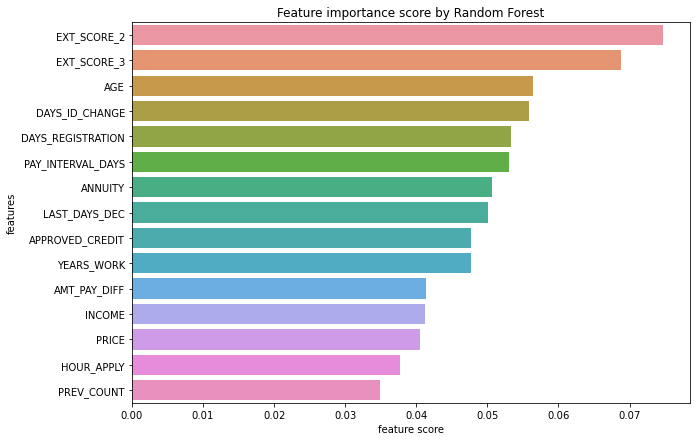

In [25]:
#feature importance scoring by using Random Forest algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=0,n_jobs=4)
forest.fit(X1, y)
indices = np.argsort(forest.feature_importances_)[::-1]
cc = DataFrame({'feature score':Series(forest.feature_importances_),'features':Series(X1.columns)})   

#plot top 15 important features
plt.figure(figsize=(10,7))
sns.barplot(x='feature score',y='features',data=cc.sort_values(by='feature score',ascending=False).head(15))
plt.title('Feature importance score by Random Forest')

As we can see, several features have high importance score such as EXT_SCORE_2, EXT_SCORE_3, AGE, PAY_INTERVAL_DAYS and so on (also confirmed by plotting the relations). We will take top 50 features with high importance score for our selected features. In addition, feature scaling must be performed for this machine learning model (we use Standard Scaling).

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#select only top 50 important features
new_col = np.array(Series(X1.columns[indices]).head(50))
X1_new = X1[new_col]

#make pipeline with scaler
pipe = Pipeline([("scaler", StandardScaler()), ("logreg", LogisticRegression(random_state=0))])
param_grid = {'logreg__C': [10, 11, 12]}
fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

#begin grid-searching for hyperparameters tuning
grid_logreg = GridSearchCV(pipe, param_grid=param_grid, cv=fold, scoring='roc_auc')
grid_logreg.fit(X1_new,y)

print('Best hyperparameter: ', grid_logreg.best_params_)
print('Best cross validation score: ', grid_logreg.best_score_)

Best hyperparameter:  {'logreg__C': 12}
Best cross validation score:  0.7420757078305436


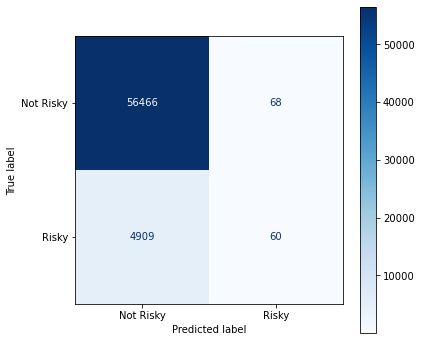

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(1,1,figsize=(6,6))
plot_confusion_matrix(grid_logreg, X1_new, y, display_labels=['Not Risky','Risky'], cmap=plt.cm.Blues, ax=ax)

For logistic regression, our best AUC score in cross validation scheme is 0.7421 with hyperparameters C = 12. Also shown here the confusion matrix that results from implementing the model to the training data.

### XGBoost

Before training the data using XGBoost, again we perform feature selection. This can easily be done because XGBoost provide straightforward method for feature selection by calculating feature importances.

Text(0.5, 1.0, 'Feature importance score by XGBoost')

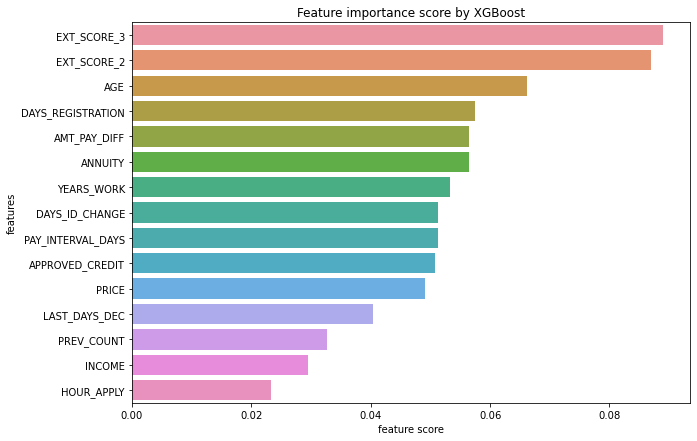

In [28]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0, n_estimators=300, colsample_bytree=0.3, gamma=1, n_jobs=4, max_depth=3, learning_rate=0.1,
                   importance_type='weight')
xgb.fit(X1,y)
indices = np.argsort(xgb.feature_importances_)[::-1]
cc = DataFrame({'feature score':Series(xgb.feature_importances_),'features':Series(X1.columns)})    

plt.figure(figsize=(10,7))
sns.barplot(x='feature score',y='features',data=cc.sort_values(by='feature score',ascending=False).head(15))
plt.title('Feature importance score by XGBoost')

Several features which have high importance score are in accordance to the previous result using Random Forest. We will take top 50 features with high importance score for our selected features.

In [29]:
#select only top 50 important features
new_col = np.array(Series(X1.columns[indices]).head(50))
X1_new = X1[new_col]

#build model and tune it
xgb = XGBClassifier(random_state=0, learning_rate=0.1, gamma=1, n_jobs=4)
param_grid = {'n_estimators' : [200, 250], 'max_depth' : [3, 4], 'colsample_bytree' : [0.3, 0.4]}
fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
grid_xgb = GridSearchCV(xgb, param_grid=param_grid, cv=fold, scoring='roc_auc')
grid_xgb.fit(X1_new,y)
print('Best hyperparameter: ', grid_xgb.best_params_)
print('Best cross validation score: ', grid_xgb.best_score_)

Best hyperparameter:  {'colsample_bytree': 0.4, 'max_depth': 3, 'n_estimators': 250}
Best cross validation score:  0.7497080366467859


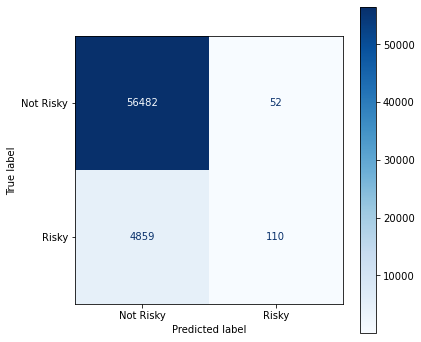

In [30]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
plot_confusion_matrix(grid_xgb, X1_new, y, display_labels=['Not Risky','Risky'], cmap=plt.cm.Blues, ax=ax)

For XGBoost, our best AUC score in cross validation scheme is 0.7497 (1.02% better than Logistic Regression) with hyperparameters colsample_bytree = 0.4, max_depth = 3, and n_estimators = 250. Also shown here the confusion matrix that results from implementing the model to the training data.

### LightGBM

Before training the data using LightGBM, again we perform feature selection. This can easily be done because LightGBM provide straightforward method for feature selection by calculating feature importances.

Text(0.5, 1.0, 'Feature importance score by LightGBM')

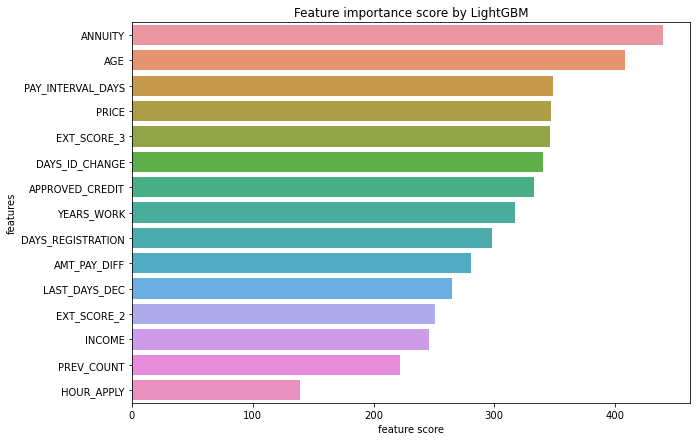

In [31]:
import re
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=0, n_jobs=4, learning_rate=0.05, n_estimators=200, colsample_bytree=0.2, reg_lambda=5)
lgb.fit(X1.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)),y)
indices = np.argsort(lgb.feature_importances_)[::-1]
cc = DataFrame({'feature score':Series(lgb.feature_importances_),'features':Series(X1.columns)})    

plt.figure(figsize=(10,7))
sns.barplot(x='feature score',y='features',data=cc.sort_values(by='feature score',ascending=False).head(15))
plt.title('Feature importance score by LightGBM')

Several features which have high importance score are in accordance to the previous results using Random Forest and XGBoost feature importance. We will take top 50 features with high importance score for our selected features.

In [32]:
#select only top 50 important features
new_col = np.array(Series(X1.columns[indices]).head(50))
X1_new = X1[new_col]

#build model and tune it
lgb = LGBMClassifier(random_state=0, n_jobs=4, learning_rate=0.05)
param_grid = {'n_estimators' : [200, 250], 'reg_lambda' : [40, 50, 60], 'colsample_bytree' : [0.3, 0.4]}
fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
grid_lgb = GridSearchCV(lgb, param_grid=param_grid, cv=fold, scoring='roc_auc')
grid_lgb.fit(X1_new.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)),y)
print('Best hyperparameter: ', grid_lgb.best_params_)
print('Best cross validation score: ', grid_lgb.best_score_)

Best hyperparameter:  {'colsample_bytree': 0.4, 'n_estimators': 250, 'reg_lambda': 60}
Best cross validation score:  0.7505323953012196


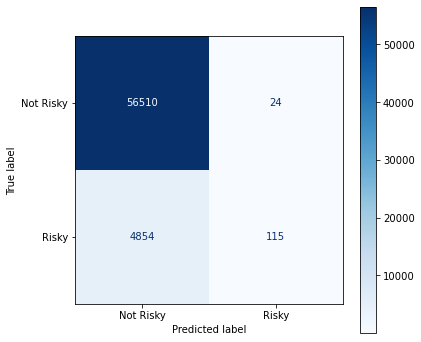

In [33]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
plot_confusion_matrix(grid_lgb, X1_new, y, display_labels=['Not Risky','Risky'], cmap=plt.cm.Blues, ax=ax)

For LightGBM, our best AUC score in cross validation scheme is 0.7505 (0.11% better than XGBoost) with hyperparameters colsample_bytree = 0.4, n_estimators = 250, and reg_lambda = 60. Also shown here the confusion matrix that results from implementing the model to the training data. This model can capture the risky client better than the other model so far.

## Predictive Model Using Type 2 Dataset

Next, we will build predictive model using type 2 dataset. With this dataset, only machine learning algorithm with automatic missing values handler can be applied. Here we only use 2 model: XGBoost and LightGBM, since both of these models can handle missing values automatically. Similar to the previous method, every model were tuned using Grid Search - Cross Validation method. 

### XGBoost

Just like the previous method, we perform feature selection before training the data.

Text(0.5, 1.0, 'Feature importance score by XGBoost')

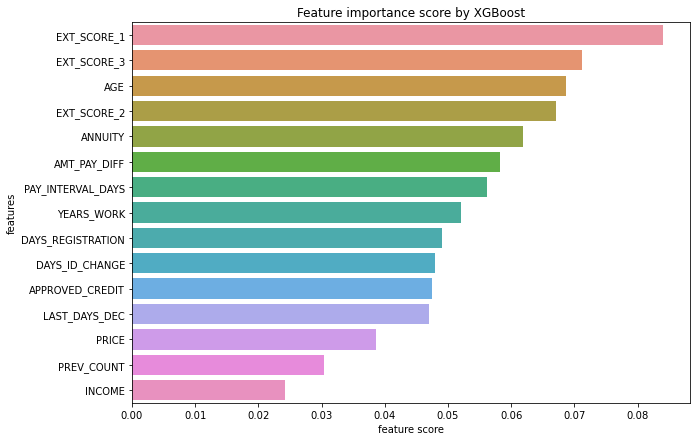

In [34]:
xgb = XGBClassifier(random_state=0, n_estimators=300, colsample_bytree=0.3, gamma=1, n_jobs=4, max_depth=3, learning_rate=0.1,
                   importance_type='weight')
xgb.fit(X2,y)
indices = np.argsort(xgb.feature_importances_)[::-1]
cc = DataFrame({'feature score':Series(xgb.feature_importances_),'features':Series(X2.columns)})    

plt.figure(figsize=(10,7))
sns.barplot(x='feature score',y='features',data=cc.sort_values(by='feature score',ascending=False).head(15))
plt.title('Feature importance score by XGBoost')

Consistent with the previous results on type 1 dataset, the features EXT_SCORE_2, EXT_SCORE_3, AGE,  ANNUITY, and PAY_INTERVAL_DAYS are still on the top feature list. Additionally, we have another important feature: EXT_SCORE_1. This result confirms that EXT_SCORE_1 is indeed an important factor to determine whether a client would be classified as risky or not. 

We will take top 50 features with high importance score for our selected features.

In [35]:
#build model and tune it again
new_col = np.array(Series(X2.columns[indices]).head(50))
X2_new = X2[new_col]
xgb = XGBClassifier(random_state=0, learning_rate=0.1, gamma=1, n_jobs=4)
param_grid = {'n_estimators' : [200, 250], 'max_depth' : [3, 4], 'colsample_bytree' : [0.5, 0.6]}
fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
grid_xgb_na = GridSearchCV(xgb, param_grid=param_grid, cv=fold, scoring='roc_auc')
grid_xgb_na.fit(X2_new,y)
print('Best hyperparameter: ', grid_xgb_na.best_params_)
print('Best cross validation score: ', grid_xgb_na.best_score_)

Best hyperparameter:  {'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 250}
Best cross validation score:  0.758119158442611


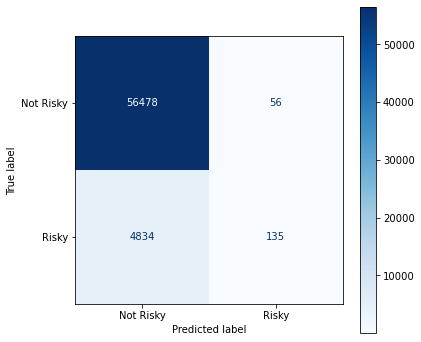

In [38]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
plot_confusion_matrix(grid_xgb_na, X2_new, y, display_labels=['Not Risky','Risky'], cmap=plt.cm.Blues, ax=ax)

For XGBoost, our best AUC score in cross validation scheme is 0.7581 (1.12% better than XGBoost with type 1 dataset) with hyperparameters colsample_bytree = 0.5, max_depth = 3, and n_estimators = 250. Also shown here the confusion matrix that results from implementing the model to the training data.

### LightGBM

Remember to perform feature selection before training the data.

Text(0.5, 1.0, 'Feature importance score by LightGBM')

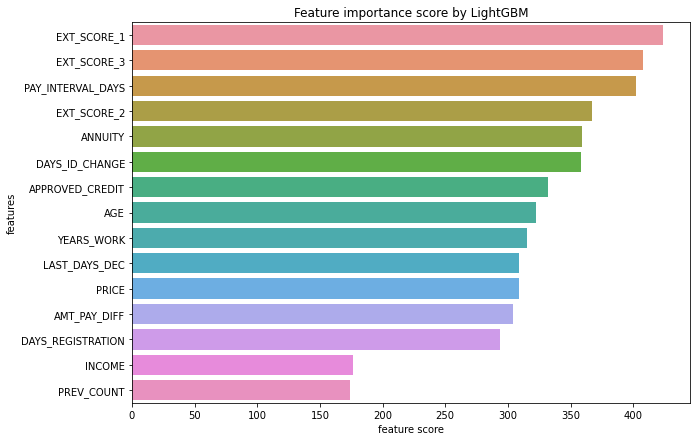

In [39]:
#feature importance scoring by using LightGBM algorithm
lgb = LGBMClassifier(random_state=0, n_jobs=4, learning_rate=0.05, n_estimators=200, colsample_bytree=0.4, reg_lambda=50)
lgb.fit(X2.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)),y)
indices = np.argsort(lgb.feature_importances_)[::-1]
cc = DataFrame({'feature score':Series(lgb.feature_importances_),'features':Series(X2.columns)})    

plt.figure(figsize=(10,7))
sns.barplot(x='feature score',y='features',data=cc.sort_values(by='feature score',ascending=False).head(15))
plt.title('Feature importance score by LightGBM')

Several features which have high importance score (including EXT_SCORE_1) are in accordance to the previous results using XGBoost feature importance. We will take top 50 features with high importance score for our selected features.

In [40]:
#build model and tune it again
new_col = np.array(Series(X2.columns[indices]).head(50))
X2_new = X2[new_col]
lgb = LGBMClassifier(random_state=0, n_jobs=4, learning_rate=0.05)
param_grid = {'n_estimators' : [200, 250], 'reg_lambda' : [20, 30], 'colsample_bytree' : [0.2, 0.3]}
fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
grid_lgb_na = GridSearchCV(lgb, param_grid=param_grid, cv=fold, scoring='roc_auc')
grid_lgb_na.fit(X2_new.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)),y)
print('Best hyperparameter: ', grid_lgb_na.best_params_)
print('Best cross validation score: ', grid_lgb_na.best_score_)

Best hyperparameter:  {'colsample_bytree': 0.3, 'n_estimators': 250, 'reg_lambda': 20}
Best cross validation score:  0.759118936918844


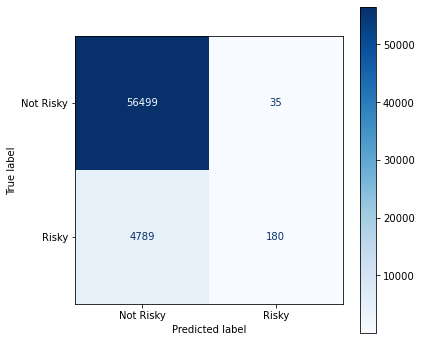

In [41]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
plot_confusion_matrix(grid_lgb_na, X2_new, y, display_labels=['Not Risky','Risky'], cmap=plt.cm.Blues, ax=ax)

For LightGBM, our best AUC score in cross validation scheme is 0.7591 (1.15% better than LightGBM with type 1 dataset) with hyperparameters colsample_bytree = 0.3, n_estimators = 250, and reg_lambda = 20. Also shown here the confusion matrix that results from implementing the model to the training data.

## Risk Ranking

To conclude our findings, the most appropriate model for this problem is LightGBM with tuned hyperparameters:
- learning_rate = 0.05
- colsample_bytree = 0.3
- n_estimators = 250
- reg_lambda = 20

Type 2 dataset (partially imputed missing values) should be used to achieve the best score. Also, feature selection should be applied by selecting top 50 important features to improve the model further. 

In a practical sense, this model can help the lenders by providing risk ranking of every client based on the calculated probability. Higher probability means that the client tend to be classified as risky applicant. For example, let’s use the whole training dataset of type 2. Implementing our best-tuned LightGBM model will produce the risk ranking of each client as follows.

In [43]:
probs = Series(grid_lgb_na.predict_proba(X2_new)[:,1])
rank = df['LN_ID']
rank = pd.concat([rank,probs],axis=1)
rank_train = rank.rename(columns={0 : "PROBABILITY"})
rank_train = rank_train.sort_values(by='PROBABILITY', ascending=False)
rank_train = rank_train.set_index(Series([x for x in range(1,len(rank)+1)]))
rank_train

,LN_ID,PROBABILITY
1,114511,0.780771
2,390304,0.751192
3,296838,0.740428
4,344324,0.721942
5,294957,0.720066
...,...,...
61499,242643,0.005193
61500,375305,0.005152
61501,390327,0.005069
61502,433822,0.004910


We can see that client with LN_ID of 114511 has the highest probability of being riksy applicant with probability of 0.78. The lenders can choose some threshold value for the probability (0.6 let’s say) and make following criterion:
- clients with probability > 0.6 are not eligible for the loan application 
- clients with probability between 0.1 - 0.6 will be given credit limit with several classes (low, medium, and high)
- clients with probability < 0.1 are considered as ‘safe’ applicants

We can also inspect the distribution value of the probability using histogram.

<AxesSubplot:>

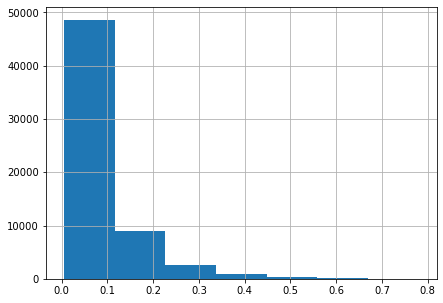

In [61]:
plt.figure(figsize=(7,5))
rank_train['PROBABILITY'].hist(bins=7)

## Testing the Model

Before implementing our best model to the test data, we have to preprocess the test data in similar fashion with the training data. Let’s examine first how many missing values are present in the test data.

In [64]:
dt = pd.read_csv('test.csv')
dt = dt.drop(dt.columns[0], axis=1)
dt

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,219092,0,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,Working,...,-17598,-2650,-1411.0,-1131,SATURDAY,7,Business Entity Type 3,NaN,0.145475,0.651260
1,141577,0,Cash loans,F,0,144000.0,485640.0,34537.5,450000.0,Working,...,-14097,-7408,-7908.0,-4872,MONDAY,14,Kindergarten,NaN,0.682675,NaN
2,180205,0,Cash loans,F,1,90000.0,247500.0,8887.5,247500.0,Working,...,-18384,-2826,-8226.0,-1930,SATURDAY,12,Self-employed,0.814700,0.686312,0.758393
3,357381,0,Cash loans,M,2,112500.0,506889.0,24781.5,418500.0,Working,...,-12170,-926,-916.0,-4048,THURSDAY,13,Other,0.399219,0.266520,0.058826
4,271229,0,Cash loans,M,0,216000.0,450000.0,21888.0,450000.0,Working,...,-10790,-577,-4640.0,-2035,MONDAY,14,Business Entity Type 3,0.368452,0.610483,0.392774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14756,144293,0,Cash loans,F,1,67500.0,112500.0,7317.0,112500.0,Working,...,-12866,-3154,-1251.0,-4395,TUESDAY,10,Government,0.570305,0.399628,0.586740
14757,272093,1,Cash loans,F,1,135000.0,313438.5,21073.5,283500.0,Working,...,-11421,-3962,-5247.0,-3795,SATURDAY,7,Self-employed,NaN,0.610758,0.368969
14758,251117,0,Cash loans,F,0,157500.0,1078200.0,31522.5,900000.0,State servant,...,-13313,-2258,-3899.0,-4515,MONDAY,12,Other,NaN,0.639824,0.782608
14759,334313,0,Cash loans,F,0,216000.0,272520.0,21658.5,225000.0,Pensioner,...,-24085,365243,-9354.0,-4740,THURSDAY,15,NA1,NaN,0.642139,0.584990


In [65]:
nas = dt.isna().sum()
nas[nas>0]

PRICE            20
EXT_SCORE_1    8312
EXT_SCORE_2      19
EXT_SCORE_3    2919
dtype: int64

Our best model use type 2 data preprocessing (partially imputing missing values). Therefore, we should perform the same preprocessing steps on the test data which includes creating new features from another table and imputing several missing values.

In [66]:
#simple transformation for DAYS features
dt['AGE'] = dt['DAYS_AGE']/(-365)
dt['YEARS_WORK'] = dt['DAYS_WORK']/(-365)
dt['DAYS_REGISTRATION'] = dt['DAYS_REGISTRATION']/(-1)
dt['DAYS_ID_CHANGE'] = dt['DAYS_ID_CHANGE']/(-1)
dt = dt.drop(columns=['DAYS_AGE','DAYS_WORK'])

#replace anomaly values in YEARS_WORK with NA
dt.loc[dt['YEARS_WORK']<0,'YEARS_WORK'] = np.nan

#impute PRICE and EXT_SCORE_2
dt.loc[dt['PRICE'].isna(),'PRICE'] = dt.loc[dt['PRICE'].isna(),'APPROVED_CREDIT']
dt.loc[dt['EXT_SCORE_2'].isna(),'EXT_SCORE_2'] = dt['EXT_SCORE_2'].median()

In [67]:
#create the derived new features from prev_app.csv
join1 = pd.merge(dt, dfp.groupby('LN_ID').count()['SK_ID_PREV'], on='LN_ID', how='left')
join1 = pd.merge(join1, dfp.groupby(['LN_ID'])['CONTRACT_STATUS'].agg(lambda x: x.value_counts().index[0]), on='LN_ID', how='left')
join1 = pd.merge(join1, -dfp.groupby('LN_ID')['DAYS_DECISION'].max(), on='LN_ID', how='left')

#create the derived new features from installment_payment.csv
join2 = pd.merge(join1, dfi.groupby('LN_ID')['PAY_INTERVAL_DAYS'].mean(), on='LN_ID', how='left')
join2 = pd.merge(join2, dfi.groupby('LN_ID')['AMT_PAY_DIFF'].mean(), on='LN_ID', how='left')
join2 = join2.rename(columns={"SK_ID_PREV": "PREV_COUNT", "CONTRACT_STATUS": "PREV_STATUS", "DAYS_DECISION" : "LAST_DAYS_DEC"})

#impute the remaining NA values
join2.loc[join2['PREV_COUNT'].isna(),'PREV_COUNT'] = 0
join2.loc[join2['PREV_STATUS'].isna(),'PREV_STATUS'] = 'NA1'

After that, we drop LN_ID column for modelling purpose (because it is a primary key). Then, all categorical columns must be encoded into dummy variables (one hot encoding). Lastly, separate the input data (all columns except TARGET) and the output vector (TARGET variable itself).

In [68]:
cols = ['CONTRACT_TYPE','GENDER','INCOME_TYPE','EDUCATION','FAMILY_STATUS','HOUSING_TYPE','WEEKDAYS_APPLY',
        'ORGANIZATION_TYPE','PREV_STATUS']
data = join2.drop(columns=['LN_ID'])
data = pd.concat([data,pd.get_dummies(data[cols])],axis=1)
data = data.drop(columns=cols)

X_test = data.drop('TARGET',axis=1)
y_test = data['TARGET']

Now it's time to implement our best predictive model. Based on the model building step, our best model is LightGBM wih tuned hyperparameters (learning_rate = 0.05, colsample_bytree = 0.3, n_estimators = 250, reg_lambda = 20). Feature selection also performed to the test data by selecting only top 50 important features. 

In [70]:
#use best LightGBM model with tuned hyperparameters
#select only top 50 important features
from sklearn.metrics import roc_auc_score
lgb = LGBMClassifier(random_state=0, n_jobs=4, learning_rate=0.05, n_estimators=200, colsample_bytree=0.4, reg_lambda=50)
lgb.fit(X2.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)),y)
indices = np.argsort(lgb.feature_importances_)[::-1]
new_col = np.array(Series(X2.columns[indices]).head(50))
X_new_test = X_test[new_col]

#implement the model and see the result
score = roc_auc_score(y_test, grid_lgb_na.predict_proba(X_new_test)[:, 1])
print('Test data AUC score: ', score)

Test data AUC score:  0.7581935165528181


The test score is slightly lower than the training score (0.12% lower). Let’s look at the another plot (confusion matrix and ROC curve) to check how well our model describe the test data.

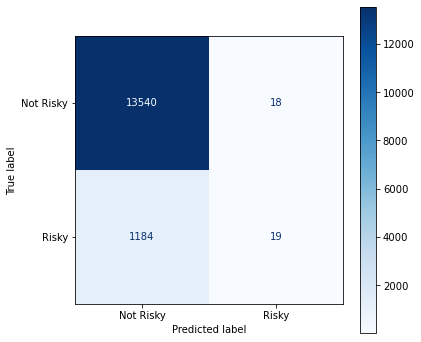

In [71]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
plot_confusion_matrix(grid_lgb_na, X_new_test, y_test, display_labels=['Not Risky','Risky'], cmap=plt.cm.Blues, ax=ax)

Text(0.5, 1.0, 'ROC Curve')

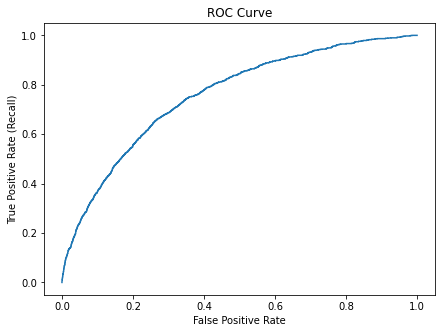

In [72]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, grid_lgb_na.predict_proba(X_new_test)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title('ROC Curve')

Based on the confusion matrix, our model has poor performance when distinguishing between 0s and 1s TARGET variable. Only 19 out of 1203 clients are correctly classified as risky applicant. The ROC curve is quite good although not too good (perfect ROC curve should has square shape). Nevertheless, our model still can be helpful to the lenders by providing risk ranking of every client based on the calculated probability as explained in the previous section. 

In [73]:
probs = Series(grid_lgb_na.predict_proba(X_new_test)[:,1])
rank = dt['LN_ID']
rank = pd.concat([rank,probs],axis=1)
rank_test = rank.rename(columns={0 : "PROBABILITY"})
rank_test = rank_test.sort_values(by='PROBABILITY', ascending=False)
rank_test = rank_test.set_index(Series([x for x in range(1,len(rank)+1)]))
rank_test

,LN_ID,PROBABILITY
1,164492,0.736946
2,322543,0.735878
3,451137,0.682939
4,100149,0.652499
5,178606,0.641568
...,...,...
14757,236157,0.006069
14758,340442,0.005942
14759,161324,0.005735
14760,277056,0.005190
